<a href="https://colab.research.google.com/github/danmaher067/week6/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 6: File ingestion and schema validation**

## **Section 1: Read the file using Dash, Modin, Ray**

### First thing to do is install modin and Dash

In [ ]:
pip install modin

import dask.dataframe as dd

In [ ]:
pip install 'fsspec>=0.3.3'

In [ ]:
pip install modin[all]

Then import the installed libaries

In [ ]:
import pandas as pd
import modin.pandas as mpd
import dask.dataframe as dd
import time

Read the file with pandas into a dataframe

The below functions will take the file as a arugument and calculate the time. taken to read using pandas , modin and dask.
The results are seen in the graph.

In [ ]:
def readPandas(file):
  start = time.time()
  dfp = df_pd=pd.read_csv(file)
  end = time.time()
  pandastimetaken = end-start
  print(f"Modin Appending Time :{pandastimetaken}")
  return pandastimetaken

In [ ]:

def readModin(file):
  start = time.time()
  mpd.read_csv(file)
  end = time.time()
  modintimetaken = end-start
  print(f"Modin Appending Time :{modintimetaken}")
  return modintimetaken

In [ ]:
def readDask(file):
  start = time.time()
  dd.read_csv(file)
  end = time.time()
  dasktimetaken = end-start
  print(f"Modin Appending Time :{dasktimetaken}")
  return dasktimetaken

Create a visulation of the time taken to read the file in pandas, modin and dask

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_Cab_Data_Combined.csv')


Modin Appending Time :3.061779737472534
Modin Appending Time :2.9961204528808594
Modin Appending Time :0.031200170516967773


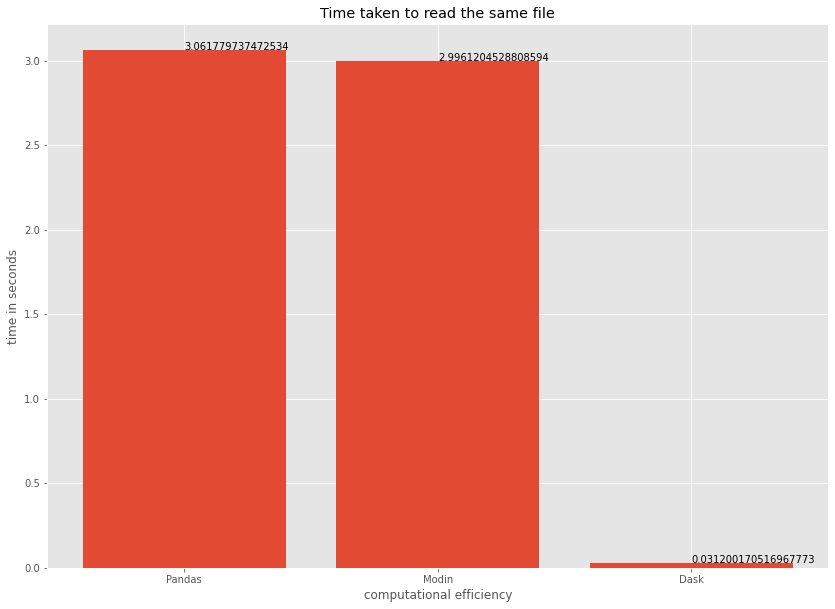

In [ ]:
# Plots styles.
plt.style.use('ggplot')
filename = '/content/drive/MyDrive/Colab Notebooks/Final_Cab_Data_Combined.csv'
# Plot size.
plt.rcParams['figure.figsize'] = (14, 10)
y = readPandas(filename),readModin(filename),readDask(filename)
x = np.array(["Pandas", "Modin", "Dask"])
for i in range(len(x)):
        plt.text(i,y[i],y[i])
plt.bar(x,y)
plt.ylabel('time in seconds')
plt.title("Time taken to read the same file")
plt.xlabel("computational efficiency")
plt.show();

The above figure shows the speed of reading a large file.<br>


*   It can be seen that the Dask is exponetaily faster than Pandas.

# Do some validation on the read file<br>

Here's how its done:<br>
  Step 1: install pandas_schema<br>
  For this we can simply do pip install pandas_schema<br>
  Step 2: define some simple type checking methods<br>
  We will read a csv file. For a simple demonstration we will just consider simple validation rules, such as checking if a type is null, integer or decimal, but using pandas_schema we can do also more complex stuff

In [ ]:
def read_file(file):
    df = pd.read_csv(file)
    if(df.empty):
      print('CSV file is empty')
    else:
      print('CSV file is not empty')

In [ ]:
read_file(filename)

CSV file is not empty


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Transaction ID      1048575 non-null  object
 1   Date of Travel      1048575 non-null  object
 2   Company             1048575 non-null  object
 3   CITY                1048575 non-null  object
 4   KM Travelled        1048575 non-null  object
 5   Price Charged       1048575 non-null  object
 6   Cost of Trip        1048575 non-null  object
 7   Customer ID         1048575 non-null  object
 8   Payment_Mode        1048575 non-null  object
 9   Gender              1048575 non-null  object
 10  Age                 1048575 non-null  object
 11  Income (USD/Month)  1048575 non-null  object
 12  Population          1048575 non-null  object
 13  Users               1048575 non-null  object
dtypes: object(14)
memory usage: 112.0+ MB


# Section 2 <br>
*** 
The schema validation rules below will validated the data in the columns<br>[schema validation example and ref ](https://github.com/TMiguelT/PandasSchema)

In [ ]:
# remove special charachers
def remSpecial(dataframe):
  # Python code to remove special char
  # using replace() 
   
  # initializing special characters 
  sp_chars = [';', ':', '!', "*"," "] 
   
  # using replace() to  
  # remove special chars  
  for i in sp_chars : 
      dataframe = dataframe.replace(i, '')
   
  # printing resultant string  
  print ("After Remove special char ")
  return dataframe

In [ ]:
#df = remSpecial(df)

After Remove special char 


In [ ]:
pip install pandas_schema

In [ ]:
from io import StringIO
from pandas_schema import Column, Schema
from pandas_schema.validation import LeadingWhitespaceValidation, TrailingWhitespaceValidation, CanConvertValidation, MatchesPatternValidation, InRangeValidation, InListValidation

In [ ]:
# Create the schema
schema1 = Schema([
    #The tranaction ID check the range, remove white spaces. 
    Column('Transaction ID', [InRangeValidation(10000000, 11000000),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    # use a regular expression to check the date
    Column('Date of Travel', [MatchesPatternValidation(r'^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)\d{4}$'),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    #Column('Company', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Company', [InListValidation(['Yellow Cab', 'Pink Cab']),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    #Column('Age', [InRangeValidation(0, 120)]),
    Column('CITY', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('KM Travelled', [InRangeValidation(0, 100),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    #Column('Price Charged',[MatchesPatternValidation(r'\d{4}.\d{2}'),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Price Charged',[InRangeValidation(0, 10000.00),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    #Column('Cost of Trip', [MatchesPatternValidation(r'\d{4}.\d{2}'),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Cost of Trip', [InRangeValidation(0, 10000.00),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    #Column('Customer ID', [MatchesPatternValidation(r'\d{5}'),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Customer ID', [InRangeValidation(0, 100000),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Payment_Mode', [InListValidation(['Card', 'Cash']),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Gender',[InListValidation(['Male', 'Female','Other']),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Age', [InRangeValidation(0, 120)]),
    Column('Income (USD/Month)', [InRangeValidation(0, 100000),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Population', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Users', [InRangeValidation(0,1000000 ),LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    #Column('Sex', [InListValidation(['Male', 'Female', 'Other'])]),
    #Column('Company', [InListValidation(['Yellow Cab', 'Pink Cab'])]),
    #Column('Customer ID', [MatchesPatternValidation(r'\d{4}[A-Z]{4}')])
])

In [ ]:
# function to check for errors in the file
def checkforErrors(dataframe):
  errors1 = schema1.validate(dataframe)
  #for error1 in errors1:
  return errors1

In [ ]:
# function to accumlate errors and remove then
def errors(daf):
  rowNumber =0
  error1 = checkforErrors(daf)
  rowNumber = int(error1[0].row)
  return daf.drop(rowNumber)
 


In [ ]:
#for i in checkforErrors():
#  print(i)


{row: 1010524, column: "Transaction ID"}: "Transaction ID" was not in the range [10000000, 11000000)
{row: 1010524, column: "Date of Travel"}: "Date of Travel" does not match the pattern "^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)\d{4}$"
{row: 1010524, column: "Company"}: "Company" is not in the list of legal options (Yellow Cab, Pink Cab)
{row: 1010524, column: "KM Travelled"}: "KM Travelled" was not in the range [0, 100)
{row: 1010524, column: "Price Charged"}: "Price Charged" was not in the range [0, 10000.0)
{row: 1010524, column: "Cost of Trip"}: "Cost of Trip" was not in the range [0, 10000.0)
{row: 1010524, column: "Customer ID"}: "Customer ID" was not in the range [0, 100000)
{row: 1010524, column: "Payment_Mode"}: "Payment_Mode" is not in the list of legal options (Card, Cash)
{row: 1010524, column: "Gender"}: "Gender" is not in the list of legal options (Male, Female, Other)
{row: 1010524, column: "Age"}: "Age" was not in the range [0, 120)
{row: 1010524, column: "

In [ ]:
#show the row id 
print(int(errors[0].row))

1010524


In [ ]:
#remove the rows with errors
#df = errors(df)

In [ ]:
#recheck for errors
#cke = checkforErrors()
#print(cke)

[]


In [ ]:
# loop over the file until the all errors are identified and removed
i = 1
df = remSpecial(df)
while i != 0:
  cke = checkforErrors(df)
  for e in cke:
    print(e)
  if len(cke) != 0:
    df = errors(df)
  else:
    i = 0
    print("Completed")



  

After Remove special char 


{row: 1010524, column: "Transaction ID"}: "Transaction ID" was not in the range [10000000, 11000000)
{row: 1010524, column: "Date of Travel"}: "Date of Travel" does not match the pattern "^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)\d{4}$"
{row: 1010524, column: "Company"}: "Company" is not in the list of legal options (Yellow Cab, Pink Cab)
{row: 1010524, column: "KM Travelled"}: "KM Travelled" was not in the range [0, 100)
{row: 1010524, column: "Price Charged"}: "Price Charged" was not in the range [0, 10000.0)
{row: 1010524, column: "Cost of Trip"}: "Cost of Trip" was not in the range [0, 10000.0)
{row: 1010524, column: "Customer ID"}: "Customer ID" was not in the range [0, 100000)
{row: 1010524, column: "Payment_Mode"}: "Payment_Mode" is not in the list of legal options (Card, Cash)
{row: 1010524, column: "Gender"}: "Gender" is not in the list of legal options (Male, Female, Other)
{row: 1010524, column: "Age"}: "Age" was not in the range [0, 120)
{row: 1010524, column: "

Completed


# Yaml<br>
yaml file in week 6 Final_Cab_Data_Combiined

In [ ]:
pip install pyaml

In [ ]:
from pyaml import yaml

Attempt number 1. With little or no knowledge of creating yaml schema files,it a long time to reasearch this topic. Lectures were no help. 

In [ ]:
import yaml
with open('Final_Cab_Data_Combiined1.yaml', 'r') as f:
  schemayaml = yaml.load(f)
  print(schemayaml)


{'TransactionID': 'int()', 'DateofTravel': 'str()', 'Company': 'bool()', 'CITY': 'str()', 'KMTravelled': 'int()', 'PriceCharged': 'int()', 'CostofTrip': 'int()', 'CustomerID': 'int()', 'Payment_Mode': 'bool()', 'Gender': 'bool()', 'Age': 'int()', 'Income': 'int()', 'Population': 'int()', 'Users': 'int()'}


In [ ]:
schemayaml = Schema([schemayaml])

In [ ]:
yamlerr = schemayaml.validate(df)

In [ ]:
print(yamlerr)
for i in yamlerr:
  print(i)

Invalid number of columns. The schema specifies 1, but the data frame has 14


In [ ]:
emp_dict = {'Transaction ID':int,'Date of Travel':object,'Company':object,'CITY':object,
            'KM Travelled':float,'Price Charged':float,'Cost of Trip':float,'Customer ID':int,
            'Payment_Mode':object,'Gender':object,'Age':int,'Income (USD/Month)':int,'Population':object,'Users'}

In [ ]:
yaml_string = yaml.dump(emp_dict)
print(yaml_string)

{Age: &id002 !!python/name:builtins.int '', CITY: &id001 !!python/name:builtins.object '',
  Company: *id001, Cost of Trip: &id003 !!python/name:builtins.float '', Customer ID: *id002,
  Date of Travel: *id001, Gender: *id001, Income (USD/Month): *id002, KM Travelled: *id003,
  Payment_Mode: *id001, Population: *id001, Price Charged: *id003, Transaction ID: *id002,
  Users: *id003}



In [ ]:
with open('Cab_Data.yaml','w')as f:
  yaml.dump(emp_dict, f)

In [ ]:
pip install yamale

  Created wheel for yamale: filename=yamale-3.0.4-cp37-none-any.whl size=48031 sha256=a68d51d95d24d8f97b3d69d5507dd60040df4f5c02588242a5c69d0e388131f1
  Stored in directory: /root/.cache/pip/wheels/1a/55/41/79433f196ea0f555797c109f8b22345fb1f79f016961ed4e35
Successfully built yamale


ref:https://github.com/23andMe/Yamale & https://pypi.org/project/yamale/

In [ ]:
# Import Yamale and make a schema object:
import yamale
schema = yamale.make_schema('Final_Cab_Data_Combiined1.yaml')

In [ ]:
# Create a Data object
data = yamale.make_data('data.yaml')

In [ ]:
err = yamale.validate(schema, data)

In [ ]:
for i in err:
  print(i)

'data.yaml' is Valid


# Section 3 

In [ ]:
def changeDelimiter():
  import csv
  try:
      reader = csv.reader(open(filename, "r"), delimiter=',')
      writer = csv.writer(open('/content/drive/MyDrive/Colab Notebooks/Final_Cab_Delimeter_Changed.txt', 'w'), delimiter='|')
      writer.writerows(reader)
      print("Delimiter successfully changed")
  except IOError:
      print("File read write error")


In [ ]:
changeDelimiter()

Delimiter successfully changed


In [78]:
describe = str(df.describe)

In [80]:
countRows = str(df.count())

In [126]:
#columns
totalColumns = str(len(df.columns))
tC ="The total number of columns is "+ totalColumns
tC

'The total number of columns is 14'

In [121]:
import os
filesize = os.stat('/content/drive/MyDrive/Colab Notebooks/Final_Cab_Data_Combined.csv').st_size
totalfilesize = "The file size is: " + str(filesize) + " kB"
totalfilesize

'The file size is: 111765645 kB'

In [127]:
#write
import os
f = open(r"Week6_summary.txt", "w") 
f.write("This is a Summary file for week 6 assignmemnt. \n\n")
f.write("THe total count of the rows:\n" + countRows+"\n")
f.write("\n"+tC+"\n")
f.write("\n"+totalfilesize)
f.close()
#read
f = open("mydocument.txt", "r")
print("New text:",f.read())

New text: This is a Summary file for week 6 assignmemnt. 
<bound method NDFrame.describe of         Transaction ID Date of Travel  ... Population  Users
0             10000011     08/01/2016  ...    814,885  24701
1             10000012     06/01/2016  ...    814,885  24701
2             10000013     02/01/2016  ...    814,885  24701
3             10000014     07/01/2016  ...    814,885  24701
4             10000015     03/01/2016  ...    814,885  24701
...                ...            ...  ...        ...    ...
1048570       10048157     25/06/2016  ...    942,908  22157
1048571       10048158     30/06/2016  ...    942,908  22157
1048572       10048159     01/07/2016  ...    942,908  22157
1048573       10048160     26/06/2016  ...    942,908  22157
1048574       10048161     25/06/2016  ...    942,908  22157

[1048574 rows x 14 columns]>/nTransaction ID        1048574
Date of Travel        1048574
Company               1048574
CITY                  1048574
KM Travelled          104